In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('nations_final.csv', index_col='Unnamed: 0',parse_dates=True)

In [ ]:
df

,Australia,United States,Hawaii,France,Brazil,South Africa,Portugal,Ireland,Spain,New Zealand,Japan,Italy
2010-01-01,16,8,4,2,2,2,1.0,0.0,0.0,0.0,0.0,0.0
2011-01-01,14,7,3,2,6,2,1.0,0.0,0.0,0.0,0.0,0.0
2012-01-01,13,7,3,2,7,2,1.0,0.0,0.0,0.0,0.0,0.0
2013-01-01,12,7,4,2,7,2,0.0,1.0,0.0,0.0,0.0,0.0
2014-01-01,13,5,3,2,7,2,1.0,1.0,1.0,0.0,0.0,0.0
2015-01-01,12,5,5,2,8,1,0.0,1.0,0.0,1.0,0.0,0.0
2016-01-01,13,4,4,2,10,1,0.0,0.0,0.0,0.0,1.0,0.0
2017-01-01,12,4,3,3,9,1,1.0,0.0,0.0,0.0,1.0,1.0
2018-01-01,10,5,3,3,10,2,1.0,0.0,0.0,0.0,1.0,0.0
2019-01-01,7,4,4,3,12,1,1.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
df.index.freq = 'AS'

In [ ]:
df.index

DatetimeIndex(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

## Exploratory Data Analysis

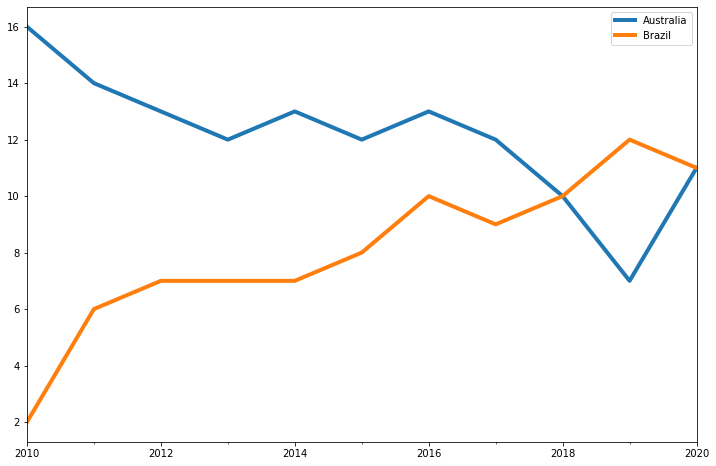

In [ ]:
df['Australia'].plot(legend=True, figsize=(12,8), lw=4)
df['Brazil'].plot(legend=True, lw=4)

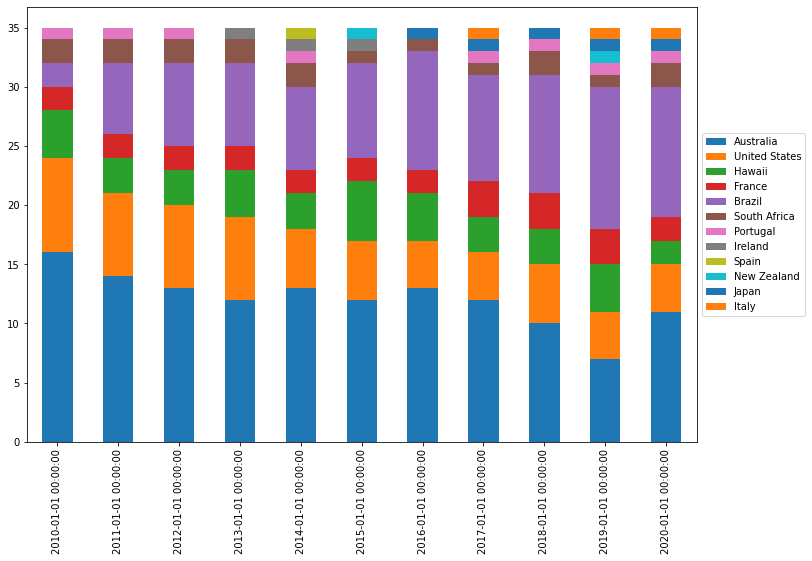

In [ ]:
df.plot(kind='bar',stacked=True, figsize=(12,8)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

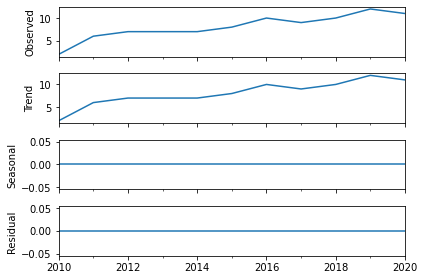

In [ ]:
#ETS Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Brazil'], model='additive')  # model='add' also works
result.plot();

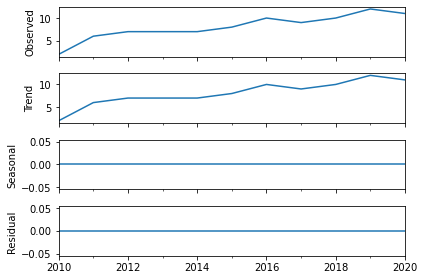

In [ ]:
#ETS Decomposition, levels

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Brazil'], model='levels')  # model='add' also works
result.plot();

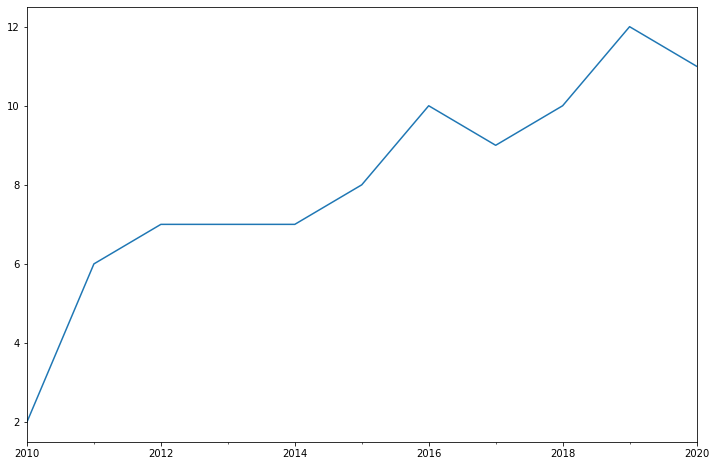

In [ ]:
df['Brazil'].plot(figsize=(12,8))

## Train test split

Only go forward with the 'Brazil' column as this is the one that we are looking to focus on. 

In [ ]:
df.drop(df.columns.difference(['Brazil']), 1 , inplace=True)

In [ ]:
df

,Brazil
2010-01-01,2
2011-01-01,6
2012-01-01,7
2013-01-01,7
2014-01-01,7
2015-01-01,8
2016-01-01,10
2017-01-01,9
2018-01-01,10
2019-01-01,12


In [ ]:
len(df)

11

In [ ]:
train = df.iloc[:8]
test = df.iloc[8:]

In [ ]:
train

,Brazil
2010-01-01,2
2011-01-01,6
2012-01-01,7
2013-01-01,7
2014-01-01,7
2015-01-01,8
2016-01-01,10
2017-01-01,9


In [ ]:
test

,Brazil
2018-01-01,10
2019-01-01,12
2020-01-01,11


## Scale the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Timeseries Generator

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [ ]:
#Only one feature as this is a time series. 

#Going to run with 3 inputs due to limited size of the dataset
#and use of own knowledge to how the WSL works. 

n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

## Build the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
#Going to use early stopping to obtain optimal performance from the model with an abitarially large number of epochs. 
#TensorBoard to be used to visualise the performance of the model. 

#from keras.callbacks import EarlyStopping,TensorBoard

In [ ]:
#early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
# Load the TensorBoard notebook extension
#%load_ext tensorboard

In [ ]:
#import tensorflow as tf
#import datetime

In [ ]:
# Clear any logs from previous runs
#!rm -rf ./logs/ 

In [ ]:
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
#Using ReLU activation function and an adam optimiser as these are proven to work well with time series data.

model = Sequential()
model.add(LSTM(100, activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

## Fit the model

In [ ]:
model.fit_generator(generator,epochs=25)

Epoch 1/25
5/5 [==============================] - 2s 391ms/step - loss: 0.4745
Epoch 2/25
5/5 [==============================] - 0s 17ms/step - loss: 0.4093
Epoch 3/25
5/5 [==============================] - 0s 11ms/step - loss: 0.3457
Epoch 4/25
5/5 [==============================] - 0s 12ms/step - loss: 0.2711
Epoch 5/25
5/5 [==============================] - 0s 12ms/step - loss: 0.2051
Epoch 6/25
5/5 [==============================] - 0s 14ms/step - loss: 0.1461
Epoch 7/25
5/5 [==============================] - 0s 13ms/step - loss: 0.0797
Epoch 8/25
5/5 [==============================] - 0s 12ms/step - loss: 0.0369
Epoch 9/25
5/5 [==============================] - 0s 14ms/step - loss: 0.0211
Epoch 10/25
5/5 [==============================] - 0s 12ms/step - loss: 0.0105
Epoch 11/25
5/5 [==============================] - 0s 12ms/step - loss: 0.0153
Epoch 12/25
5/5 [==============================] - 0s 13ms/step - loss: 0.0159
Epoch 13/25
5/5 [==============================] - 0s 11ms/s

## Plot the loss

In [ ]:
import matplotlib.pyplot as plt 

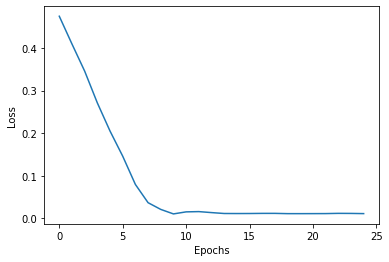

In [ ]:
plt.plot(range(len(model.history.history['loss'])), model.history.history['loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.savefig('training_loss.jpeg')

## Evaluate the test data

In [ ]:
first_eval_batch = scaled_train[-3:]
first_eval_batch

array([[0.75 ],
       [1.   ],
       [0.875]])

In [ ]:
first_eval_batch = first_eval_batch.reshape((1,n_input,n_features))

In [ ]:
model.predict(first_eval_batch)

array([[1.0123347]], dtype=float32)

In [ ]:
scaled_test[0]

array([1.])

## Forecasting using an RNN model

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

#Forecast the length of the test set

for i in range(len(test)):
  #One timestep ahead of current twelve points
  current_pred = model.predict(current_batch)[0]
  #Store the prediction
  test_predictions.append(current_pred)
  #Update the current batch to include the prediction
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [ ]:
#Test predictions scaled values
test_predictions

[array([1.0123347], dtype=float32),
 array([1.1043744], dtype=float32),
 array([1.1242211], dtype=float32)]

In [ ]:
#Reverse the transformation for interpretation

true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[10.09867764],
       [10.83499527],
       [10.99376869]])

In [ ]:
#Add the predictions to the test dataframe

test['Predictions'] = true_predictions

test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Brazil,Predictions
2018-01-01,10,10.098678
2019-01-01,12,10.834995
2020-01-01,11,10.993769


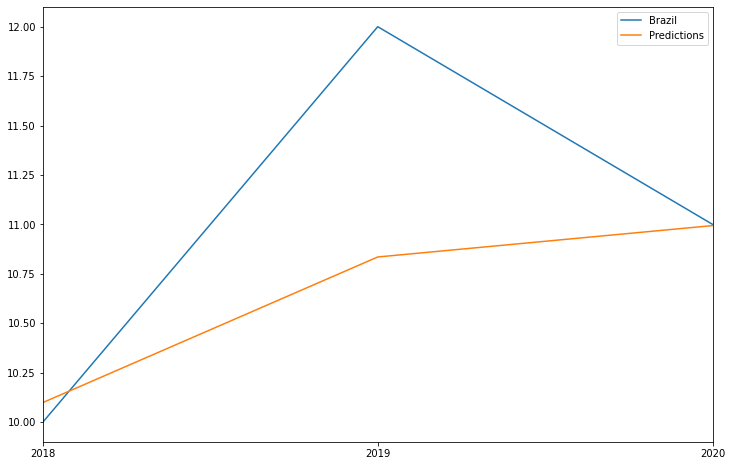

In [ ]:
test.plot(figsize=(12,8))

## Now to forecast into the future

Extend the predictions to twice the length of the test set. 

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

#Forecast double the length of the test set

for i in range(len(test)*2):
  #One timestep ahead of current twelve points
  current_pred = model.predict(current_batch)[0]
  #Store the prediction
  test_predictions.append(current_pred)
  #Update the current batch to include the prediction
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [ ]:
#Test predictions scaled values
test_predictions

[array([1.0123347], dtype=float32),
 array([1.1043744], dtype=float32),
 array([1.1242211], dtype=float32),
 array([1.2136924], dtype=float32),
 array([1.2828269], dtype=float32),
 array([1.3412402], dtype=float32)]

In [ ]:
#Reverse the transformation for interpretation

true_predictions = scaler.inverse_transform(test_predictions)
true_predictions


array([[10.09867764],
       [10.83499527],
       [10.99376869],
       [11.70953941],
       [12.2626152 ],
       [12.72992134]])

In [ ]:
test

,Brazil,Predictions
2018-01-01,10,10.098678
2019-01-01,12,10.834995
2020-01-01,11,10.993769


In [ ]:
index = pd.date_range('2018-01-01', periods=6, freq='AS')

test = test.reindex(index)


In [ ]:
test

,Brazil,Predictions
2018-01-01,10.0,10.098678
2019-01-01,12.0,10.834995
2020-01-01,11.0,10.993769
2021-01-01,NaN,NaN
2022-01-01,NaN,NaN
2023-01-01,NaN,NaN


In [ ]:
#Add the predictions to the test dataframe

test['Predictions'] = true_predictions

In [ ]:
test

,Brazil,Predictions
2018-01-01,10.0,10.098678
2019-01-01,12.0,10.834995
2020-01-01,11.0,10.993769
2021-01-01,NaN,11.709539
2022-01-01,NaN,12.262615
2023-01-01,NaN,12.729921


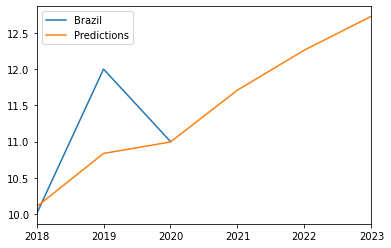

In [ ]:
test.plot()

Show a continued increse in the amount of Brazilian surfers in the mens CT. 

## Time to retrain the model on the whole dataset

In [ ]:
df

,Brazil
2010-01-01,2
2011-01-01,6
2012-01-01,7
2013-01-01,7
2014-01-01,7
2015-01-01,8
2016-01-01,10
2017-01-01,9
2018-01-01,10
2019-01-01,12


## Scale the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_df = scaler.transform(df)

## Timeseries Generator

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#Only one feature as this is a time series. 

#Going to run with 3 inputs due to limited size of the dataset
#and use of own knowledge to how the WSL works. 

n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_df, scaled_df, length=n_input, batch_size=1)

In [ ]:
#Using ReLU activation function and an adam optimiser as these are proven to work well with time series data.

model = Sequential()
model.add(LSTM(100, activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

## Fit the model

In [ ]:
model.fit_generator(generator,epochs=25)

Epoch 1/25
8/8 [==============================] - 0s 51ms/step - loss: 0.5113
Epoch 2/25
8/8 [==============================] - 0s 13ms/step - loss: 0.4376
Epoch 3/25
8/8 [==============================] - 0s 14ms/step - loss: 0.3732
Epoch 4/25
8/8 [==============================] - 0s 15ms/step - loss: 0.3111
Epoch 5/25
8/8 [==============================] - 0s 13ms/step - loss: 0.2409
Epoch 6/25
8/8 [==============================] - 0s 12ms/step - loss: 0.1721
Epoch 7/25
8/8 [==============================] - 0s 12ms/step - loss: 0.1037
Epoch 8/25
8/8 [==============================] - 0s 14ms/step - loss: 0.0446
Epoch 9/25
8/8 [==============================] - 0s 14ms/step - loss: 0.0115
Epoch 10/25
8/8 [==============================] - 0s 13ms/step - loss: 0.0108
Epoch 11/25
8/8 [==============================] - 0s 13ms/step - loss: 0.0099
Epoch 12/25
8/8 [==============================] - 0s 14ms/step - loss: 0.0071
Epoch 13/25
8/8 [==============================] - 0s 14ms/st

## Plot the loss

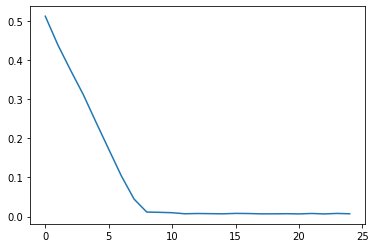

In [ ]:
plt.plot(range(len(model.history.history['loss'])), model.history.history['loss'])

## Evaluate the test data

In [ ]:
first_eval_batch = scaled_df[-3:]
first_eval_batch

array([[0.8],
       [1. ],
       [0.9]])

In [ ]:
first_eval_batch = first_eval_batch.reshape((1,n_input,n_features))

In [ ]:
model.predict(first_eval_batch)

array([[0.98684984]], dtype=float32)

In [ ]:
scaled_df[0]

array([0.])

## Forecasting using an RNN model

In [ ]:
df_predictions = []

first_eval_batch = scaled_df[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

#Forecast 3 years into the future

for i in range(3):
  #One timestep ahead of current twelve points
  current_pred = model.predict(current_batch)[0]
  #Store the prediction
  df_predictions.append(current_pred)
  #Update the current batch to include the prediction
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [ ]:
#Test predictions scaled values
df_predictions

[array([0.98684984], dtype=float32),
 array([1.0559297], dtype=float32),
 array([1.056718], dtype=float32)]

In [ ]:
#Reverse the transformation for interpretation

true_predictions = scaler.inverse_transform(df_predictions)
true_predictions


array([[11.86849844],
       [12.55929661],
       [12.56717992]])

In [ ]:
this_array = np.array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

true_predictions = np.concatenate((this_array, true_predictions))
true_predictions

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [11.86849844],
       [12.55929661],
       [12.56717992]])

In [ ]:
df

,Brazil
2010-01-01,2
2011-01-01,6
2012-01-01,7
2013-01-01,7
2014-01-01,7
2015-01-01,8
2016-01-01,10
2017-01-01,9
2018-01-01,10
2019-01-01,12


In [ ]:
index = pd.date_range('2010-01-01', periods=14, freq='AS')

df = df.reindex(index)


In [ ]:
df

,Brazil
2010-01-01,2.0
2011-01-01,6.0
2012-01-01,7.0
2013-01-01,7.0
2014-01-01,7.0
2015-01-01,8.0
2016-01-01,10.0
2017-01-01,9.0
2018-01-01,10.0
2019-01-01,12.0


In [ ]:
#Add the predictions to the test dataframe

df['Predictions'] = true_predictions

In [ ]:
df

,Brazil,Predictions
2010-01-01,2.0,0.000000
2011-01-01,6.0,0.000000
2012-01-01,7.0,0.000000
2013-01-01,7.0,0.000000
2014-01-01,7.0,0.000000
2015-01-01,8.0,0.000000
2016-01-01,10.0,0.000000
2017-01-01,9.0,0.000000
2018-01-01,10.0,0.000000
2019-01-01,12.0,0.000000


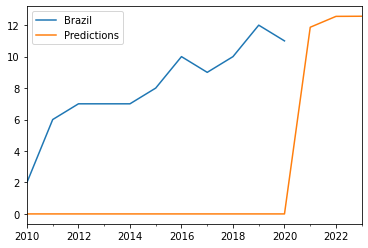

In [ ]:
df.plot()

Show a continued increse in the amount of Brazilian surfers in the mens CT. 

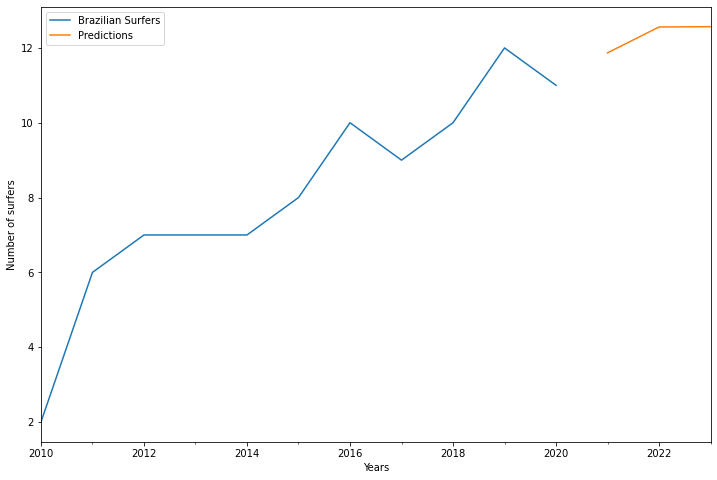

In [ ]:
ax = df['Brazil'].plot(label='Brazilian Surfers',legend=True,figsize=(12,8))

df['Predictions'].iloc[-3:].plot(label='Predictions',legend=True,ax=ax)

plt.xlabel('Years')
plt.ylabel('Number of surfers')

plt.savefig('rnn_predictions.jpeg')

Predicts that it will incrase a bit further and start to plateau. 